Práctica 2:

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from abc import ABCMeta,abstractmethod
import numpy as np
from Datos import Datos
import matplotlib.pyplot as plt

Datasets:

In [120]:
dataset1 = pd.read_csv('ConjuntosDatosP2/pima-indians-diabetes.csv')
dataset2 = pd.read_csv('ConjuntosDatosP2/wdbc.csv')

Diabetes:

In [121]:
X = dataset1[['Pregs','Plas','Pres','Skin','Test','Mass','Pedi','Age']].values
y = dataset1[['Class']].values.ravel()

Preparamos el entrenamiento:

In [122]:
# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Miramos las predicciones:

In [123]:
y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

[0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 0 0 1]
Precisión: 0.7012987012987013


Miramos la matriz de confusión: 

In [124]:
print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# |Verdaderos Positivos | Falsos negativos    |
# |Falsos Positivos     | Verdaderos Negativos|

# Ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

[[69 16]
 [30 39]]


Reporte de clasificación:

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        85
           1       0.71      0.57      0.63        69

    accuracy                           0.70       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.70      0.70      0.70       154



Escoger el mejor valor para K-NN:

Error Mínimo:  0.2987012987012987 en n_neighbor:  4


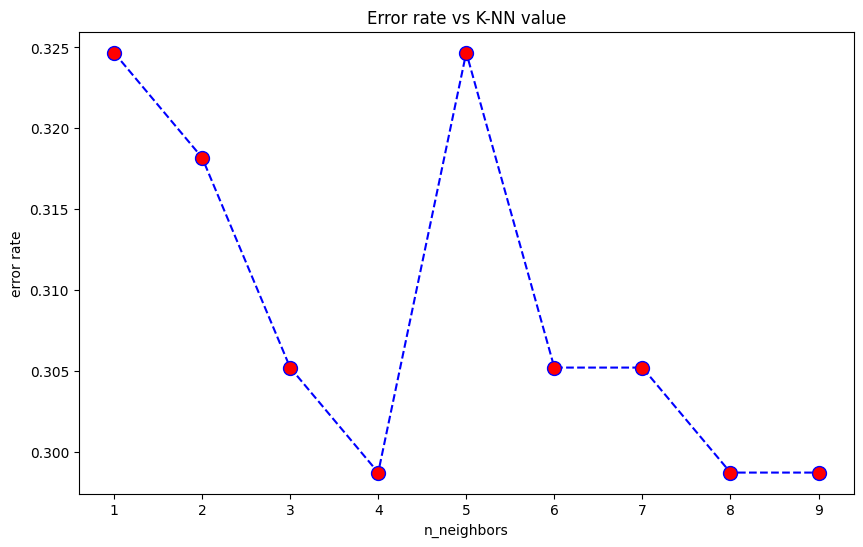

In [126]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)
    

El punto más cercano a la zona de abajo será el vecino con el menor índice de error y por tanto el más cercano.

Repetimos para wdbc:

['M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M'
 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'B']
Precisión: 0.956140350877193
[[67  1]
 [ 4 42]]
              precision    recall  f1-score   support

           B       0.94      0.99      0.96        68
           M       0.98      0.91      0.94        46

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Error Mínimo:  0.043859649122807015 en n_neighbor:  3


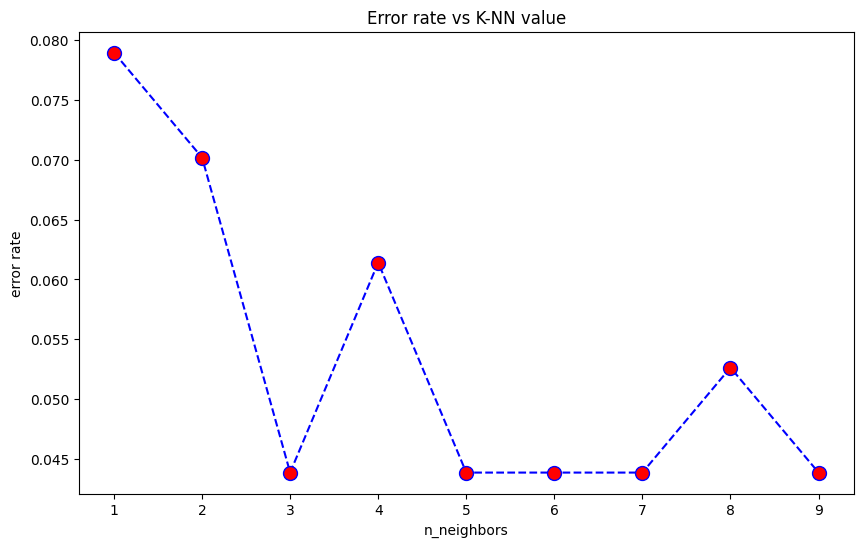

In [128]:
X = dataset2[['Atributo1','Atributo2','Atributo3','Atributo4','Atributo5','Atributo6','Atributo7','Atributo8','Atributo9','Atributo10','Atributo11','Atributo12','Atributo13','Atributo14','Atributo15'
              ,'Atributo16','Atributo17','Atributo18','Atributo19','Atributo20','Atributo21','Atributo22','Atributo23','Atributo24','Atributo25','Atributo26','Atributo27','Atributo28','Atributo29','Atributo30']].values
y = dataset2[['Class']].values.ravel()

# Se divide en train y set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

acc = knn.score(X_test, y_test)

print('Precisión:', acc)

print(confusion_matrix(y_test, y_pred))
#Se refiere a:

# |Verdaderos Positivos | Falsos negativos    |
# |Falsos Positivos     | Verdaderos Negativos|

# Ideal es que falsos positivos y negativos sean 0 (aunque un modelo casi nunca será 100% preciso)

print(classification_report(y_test, y_pred))

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K-NN value')
plt.xlabel('n_neighbors')
plt.ylabel('error rate')
print('Error Mínimo: ', min(error_rate), 'en n_neighbor: ', error_rate.index(min(error_rate))+1)